# Banknote Authentication

This project classifies banknotes in classes of genuine and fake notes. 

A model is trained to detect fake notes from genuine notes then distinguish them from genuine notes.

The dataset used here is the banknote Authentication dataset from kaggle. This dataset contains features extracted from wavelet transformed images of both fake and genuine notes.

These features are
    
    . Variance of the wavelet transformed image
    
    . Skewness of the wavelet transformed image
    
    . kurtosis of the wavelet transformed image
    
    . entropy of the wavelet transformed image and 
    
    . classes based on the above features

In [14]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
# loading the dataset using pandas
dataset = pd.read_csv("BankNoteAuthentication.csv")
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [16]:
# preparing and exploring data
print("Rows: ", dataset.shape[0])
print("Columns: ", dataset.shape[1], "\n")
print("subset of the dataset: \n", dataset.head(), "\n")

Rows:  1372
Columns:  5 

subset of the dataset: 
    variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



## Labelling Columns in the Dataset
The "Target" column contains the TWO classes of banknotes, that is,  genuine notes and fake notes.

Genuine notes are of class "0" while fake notes are of class "1"

In [27]:
# label data
column_labels = ["Variance", "Skewness", "Kurtosis", "Entropy", "Target"]
dataset.columns = column_labels
print("Colums Names: ", dataset.columns)

Colums Names:  Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object')


In [28]:
dataset.describe()

,Variance,Skewness,Kurtosis,Entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Kurtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Saving Figures as png Images

The code below creates a function that saves plotted figures as png images when called.

In [30]:
# extra code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Check for duplicated values

In [31]:
print(dataset.duplicated().any())
duplicated_data = dataset.duplicated()
print("Number of duplicated data: ", duplicated_data[duplicated_data == True].size)

True
Number of duplicated data:  24


## Correlation

Correlation
Target      1.000000
Kurtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Target, dtype: float64


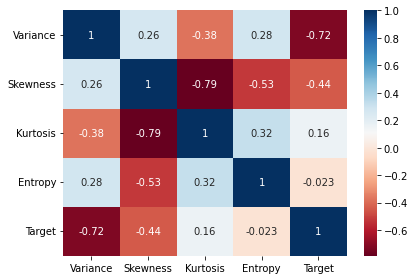

In [32]:
# Check for correlation
print("Correlation")
print(dataset.corr()["Target"].sort_values(ascending=False))
sns.heatmap(dataset.corr(), annot=True, cmap="RdBu")
save_fig("correlation")
plt.show()

In [36]:
print("Number of Authenticated: ", dataset["Target"][dataset["Target"] == 0].count())
print("Number of Unauthenticated: ", dataset["Target"][dataset["Target"] == 1].count())

Number of Authenticated:  762
Number of Unauthenticated:  610


## Data Visualization

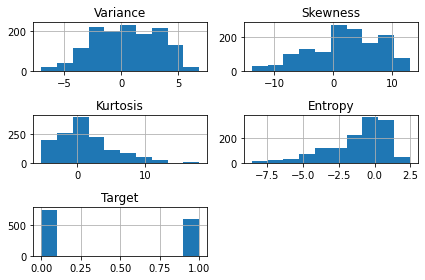

In [38]:
# plot a histogram to visualize the dataset
dataset.hist()
save_fig("banknote_data_visualization")
plt.show()

From the above histograms, Kurtosis is negative skewness while Entropy is positive skewness